# setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [ ]:
!pip install xport

In [ ]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


#Creating LC comment files for CUSEZN_H (Copper, Selenium & Zinc - Serum) where everything is detect for everyone

In [ ]:
df['CUSEZN_H'].head()

,SEQN,WTSA2YR,LBXSCU,LBDSCUSI,LBXSSE,LBDSSESI,LBXSZN,LBDSZNSI,URXUCR
0,73560.0,183653.604036,122.0,19.15,112.2,1.42,79.9,12.22,76.0
1,73564.0,194847.483347,128.0,20.10,131.2,1.67,81.0,12.39,242.0
2,73567.0,100284.090673,128.6,20.19,114.0,1.45,73.2,11.20,215.0
3,73583.0,163017.304491,NaN,NaN,NaN,NaN,NaN,NaN,151.0
4,73585.0,55880.049721,86.1,13.52,114.5,1.45,89.8,13.74,100.0


In [ ]:
df['CUSEZN_H']['LBDSCULC']=0
df['CUSEZN_H']['LBDSSELC']=0
df['CUSEZN_H']['LBDSZNLC']=0
df['CUSEZN_H']['URDUCRLC']=0

#making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

# d_p_dropna = dictionary of detect percent, omitting the Nan values

In [ ]:
#df['AMDGYD_H']
#print(fnames)
d_p = {}
d_p_dropna = {}
for name in fnames:
  # for each chemical , create df with only 'LC' cols
  n = df[name].loc[:,df[name].columns.str.endswith('LC')]
  # get percentage 
  for column in n:
    p = round(((n[column][n[column]==0].count())/len(n))*100,2)
    d_p[column] = p
    p_dropna = round(((n[column][n[column]==0].count())/len(n[column].dropna()))*100,2)
    d_p_dropna[column] = p_dropna


In [ ]:
#removing what is not a comment code, but just ends with 'LC'
d_p.pop("URXTLC")
d_p_dropna.pop("URXTLC")

0.0

In [ ]:
d_p_dropna

{'LBD2DFLC': 18.39,
 'LBD4CELC': 0.0,
 'LBDACRLC': 100.0,
 'LBDBCDLC': 71.01,
 'LBDBGELC': 0.83,
 'LBDBGMLC': 74.49,
 'LBDBMNLC': 100.0,
 'LBDBPBLC': 100.0,
 'LBDBSELC': 100.0,
 'LBDEOALC': 96.5,
 'LBDFORLC': 100.0,
 'LBDGLYLC': 100.0,
 'LBDIHGLC': 17.39,
 'LBDPFLLC': 86.75,
 'LBDSCULC': 100.0,
 'LBDSSELC': 100.0,
 'LBDSZNLC': 100.0,
 'LBDTHGLC': 74.32,
 'LBDV06LC': 2.22,
 'LBDV07LC': 1.87,
 'LBDV08LC': 1.22,
 'LBDV1DLC': 0.0,
 'LBDV2ALC': 1.5,
 'LBDV3BLC': 0.0,
 'LBDV4CLC': 7.47,
 'LBDVBFLC': 5.48,
 'LBDVBMLC': 12.09,
 'LBDVBZLC': 24.98,
 'LBDVC6LC': 1.7,
 'LBDVCBLC': 0.03,
 'LBDVCFLC': 48.92,
 'LBDVCMLC': 10.39,
 'LBDVCTLC': 0.03,
 'LBDVDBLC': 43.76,
 'LBDVDELC': 0.0,
 'LBDVDXLC': 0.0,
 'LBDVEALC': 1.56,
 'LBDVEBLC': 27.27,
 'LBDVECLC': 0.38,
 'LBDVEELC': 0.2,
 'LBDVFNLC': 14.83,
 'LBDVFTLC': 0.0,
 'LBDVHTLC': 0.84,
 'LBDVIPLC': 0.19,
 'LBDVMCLC': 0.16,
 'LBDVMELC': 2.35,
 'LBDVMPLC': 1.69,
 'LBDVNBLC': 0.0,
 'LBDVOXLC': 26.97,
 'LBDVTCLC': 0.58,
 'LBDVTELC': 0.53,
 'LBDVTOLC': 95.81

In [ ]:
len(d_p)

135

In [ ]:
#np.percentile(np.array(list(d_p.items())),[0,25,50,75,100])

In [ ]:
type(d_p)
L2=np.array(list(d_p.items()))

#Decide which we can treat as binary


In [ ]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p_dropna.items() if (val <= 30 or val >= 70)}

In [ ]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
for key in df:
    binary_cols = df[key].loc[:,df[key].columns.str.endswith('LC')]
    binary_dataset[key] = binary_cols


In [ ]:
binary_list = []
for key in binary_dataset:
  binary_dataset[key].dropna()
  binary_list.append(binary_dataset[key])


In [ ]:
len(binary_list)

17

In [ ]:
binary_df = pd.concat(binary_dataset.values())
binary_df.head()

,LBD2DFLC,LBD4CELC,LBDV06LC,LBDV07LC,LBDV08LC,LBDV1DLC,LBDV2ALC,LBDV3BLC,LBDV4CLC,LBDVBFLC,...,URDDEALC,URDDHDLC,LBDEOALC,LBDPFLLC,LBDSCULC,LBDSSELC,LBDSZNLC,URDUCRLC,LBDACRLC,LBDGLYLC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'URDDEALC', 'URDDHDLC', 'LBDEOALC', 'LBDPFLLC', 'LBDSCULC', 'LBDSSELC',
       'LBDSZNLC', 'URDUCRLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=136)

In [ ]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

# First, let's look at overlap with the PFAS Group

In [ ]:
#NAIMAN'S ORIGINAL CODE
# For each pair of data frames determine the number of entries in the intersection.
# wanted to know where i have files with multiple chemicals for one person
#
ndf=len(fnames)
M=np.zeros((ndf,ndf))
for i in range(ndf):
    for j in range(ndf):
        fnamei=fnames[i]
        fnamej=fnames[j]
        dfi=df[fnamei]
        dfj=df[fnamej]
        SEQNi=set(dfi.SEQN)
        SEQNj=set(dfj.SEQN)
        M[i,j]=len(SEQNi.intersection(SEQNj))
ndf

17

In [ ]:
#NAIMAN'S ORIGINAL CODE
# make list of all SEQNs in all the datasets, find that there is 9422 people
#
ALLSEQN=set()
for i in range(ndf):
    SEQN=set(df[fnames[i]].SEQN.astype(int))
    ALLSEQN=ALLSEQN.union(SEQN)
print(len(ALLSEQN))
#
# for each SEQN count number of data frames in which it appears
#
ALLSEQN=list(ALLSEQN)
print(len(ALLSEQN))
#
# index for each sequence number
#
index_of_sequence_number={}
ctr=0
for seqn in ALLSEQN:
    index_of_sequence_number[seqn]=ctr
    ctr+=1

9422
9422


In [ ]:
# make list of all SEQNs in PFAS group
PFAS_SEQN=[]
for i in df['PFAS_H']['SEQN']:
  PFAS_SEQN.append(i)
len(PFAS_SEQN)

2339

In [ ]:
#counting how many people show up in PFAS and other groups
count=0
for i in ALLSEQN:
  if i in PFAS_SEQN:
    count +=1
count

2339

In [ ]:
#seeing which chemical groups have the same people tested as in PFAS
shared_w_PFAS=[]
for i in fnames:
  SEQN = df[i]['SEQN']
  intersection_set = set.intersection(set(SEQN), set(PFAS_SEQN))
  intersection_list = list(intersection_set)
  if len(intersection_list) > 0:
      shared_w_PFAS.append(i)
len(shared_w_PFAS)

7

In [ ]:
#removing PFAS itself form this list
shared_w_PFAS.remove('PFAS_H')
shared_w_PFAS

['VOCWB_H', 'PHTHTE_H', 'EPHPP_H', 'IHGEM_H', 'PBCD_H', 'FLDEP_H']

# master dataframe

In [ ]:
#making one master dataframe of everything that will be used to model PFAS_H chemicals
df_predict=pd.DataFrame(data=df['PFAS_H'])
#removing records where there are missing values in the PFAS file
df_predict=df_predict.dropna()
#the number of rows printed here should match the number of rows in the dataframe
print(df_predict.shape)
for i in shared_w_PFAS:
  df_predict=pd.merge(df_predict,pd.DataFrame(data=df[i]),on='SEQN',how='left')
df_predict

(2168, 18)


,SEQN,WTSB2YR_x,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,...,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,LBDPFL,LBDPFLLC
0,73568.0,270133.488619,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73571.0,138554.659645,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73574.0,46186.186645,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73576.0,37460.999852,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,0.0
4,73577.0,128174.418941,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,83711.0,82946.684281,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2164,83712.0,114681.392602,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,...,1.0,1.0,169.46,2.15,0.0,5.91,107.56,0.0,NaN,NaN
2165,83713.0,49551.258249,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2166,83717.0,29856.202622,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#checking that everything made it into the dataframe
count= 18
for i in shared_w_PFAS:
  j = pd.DataFrame(data=df[i])
  m = j.shape[1]-1
  count += m
count

177

#which of the chemicals do we have that we will treat as binary in our model?
#removing the continuous version of it

In [ ]:
intersection_set = set.intersection(set(df_predict.columns), set(binary_df.columns))
intersection_list = list(intersection_set)
#removing this one because it is one of very very few chemicals that don't follow the naming convention
intersection_list.remove('URXTLC')

In [ ]:
print(len(intersection_list))

73


In [ ]:
#making sure we won't get rid of anything from the PFAS group that is considered a binary feature
for i in intersection_list:
  if i in df["PFAS_H"].columns:
    intersection_list.remove(i)
len(intersection_list)

73

In [ ]:
intersection_list

['LBDVCTLC',
 'URDMHPLC',
 'URD14DLC',
 'LBDVECLC',
 'URDTLCLC',
 'URDMC1LC',
 'URDMIBLC',
 'LBDV07LC',
 'URDBPFLC',
 'LBDV2ALC',
 'URDPPBLC',
 'URDMBPLC',
 'LBDVIPLC',
 'LBDVEELC',
 'LBDVBZLC',
 'LBDBGELC',
 'LBDVBMLC',
 'LBDVFNLC',
 'LBDVCMLC',
 'LBDV06LC',
 'LBDVVBLC',
 'LBDVCFLC',
 'LBDVBFLC',
 'URDCNPLC',
 'LBD2DFLC',
 'LBDVDBLC',
 'URDBUPLC',
 'LBDVNBLC',
 'LBDV1DLC',
 'URDECPLC',
 'LBDVTPLC',
 'LBDVMELC',
 'LBDV4CLC',
 'LBDPFLLC',
 'LBDVTELC',
 'LBDVMCLC',
 'LBDV08LC',
 'LBDVEBLC',
 'URDMCHLC',
 'URDTRSLC',
 'LBDVDXLC',
 'LBDVEALC',
 'URDMZPLC',
 'LBDBCDLC',
 'URDBPHLC',
 'LBDVXYLC',
 'LBDVMPLC',
 'URDMOHLC',
 'LBDIHGLC',
 'URDMNPLC',
 'URDMHHLC',
 'LBDVHTLC',
 'LBDTHGLC',
 'LBDVCBLC',
 'LBDBMNLC',
 'LBDVTOLC',
 'URDDCBLC',
 'URDEPBLC',
 'LBDVTCLC',
 'URDBP3LC',
 'LBDVDELC',
 'LBDVFTLC',
 'URDMPBLC',
 'URDMEPLC',
 'LBDBPBLC',
 'LBDBSELC',
 'URDCOPLC',
 'LBDVOXLC',
 'URDBPSLC',
 'LBDV3BLC',
 'LBDVC6LC',
 'LBDBGMLC',
 'LBD4CELC']

In [ ]:
#percentage of what is binary in df
len(intersection_list)/len(df_predict)*100

3.367158671586716

In [ ]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [ ]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

73

In [ ]:
#making sure we won't get rid of anything from the PFAS group that is considered a binary feature
for i in cols_to_drop:
  if i in df["PFAS_H"].columns:
    cols_to_drop.remove(i)

In [ ]:
len(cols_to_drop)
cols_to_drop

['LBXVCT',
 'URXMHP',
 'URX14D',
 'LBXVEC',
 'URXTLC',
 'URXMC1',
 'URXMIB',
 'LBXV07',
 'URXBPF',
 'LBXV2A',
 'URXPPB',
 'URXMBP',
 'LBXVIP',
 'LBXVEE',
 'LBXVBZ',
 'LBXBGE',
 'LBXVBM',
 'LBXVFN',
 'LBXVCM',
 'LBXV06',
 'LBXVVB',
 'LBXVCF',
 'LBXVBF',
 'URXCNP',
 'LBX2DF',
 'LBXVDB',
 'URXBUP',
 'LBXVNB',
 'LBXV1D',
 'URXECP',
 'LBXVTP',
 'LBXVME',
 'LBXV4C',
 'LBXPFL',
 'LBXVTE',
 'LBXVMC',
 'LBXV08',
 'LBXVEB',
 'URXMCH',
 'URXTRS',
 'LBXVDX',
 'LBXVEA',
 'URXMZP',
 'LBXBCD',
 'URXBPH',
 'LBXVXY',
 'LBXVMP',
 'URXMOH',
 'LBXIHG',
 'URXMNP',
 'URXMHH',
 'LBXVHT',
 'LBXTHG',
 'LBXVCB',
 'LBXBMN',
 'LBXVTO',
 'URXDCB',
 'URXEPB',
 'LBXVTC',
 'URXBP3',
 'LBXVDE',
 'LBXVFT',
 'URXMPB',
 'URXMEP',
 'LBXBPB',
 'LBXBSE',
 'URXCOP',
 'LBXVOX',
 'URXBPS',
 'LBXV3B',
 'LBXVC6',
 'LBXBGM',
 'LBX4CE']

In [ ]:
#there were a few with unique naming conventions to change
i=['LBXV08','LBXVHT','LBXVIP','LBXVMP','URXMCH','LBXVFT','LBXPFL','LBXV07','LBXVEE']
for j in i:
  cols_to_drop.remove(j)
i=['LBXV08N','LBXVTHF','LBXVIPB','LBXVMCP','URXMHNC','LBXVTFT','LBDPFL','LBXV07N','LBXVDEE']
for j in i:
  cols_to_drop.append(j)

In [ ]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
df_predict=df_predict.drop(columns=cols_to_drop)

# removing subsample weights


In [ ]:
for i in df_predict.columns:
  if i.startswith('WT'):
    df_predict = df_predict.drop(columns=i)

# Imputation

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats

for col in df_predict.columns:
  for row in range(0,len(df_predict)):

    # replace Nan vals with 0 or 1 based on detect percentages in d_p_dropna for binary values
    if math.isnan(df_predict[col].values[row]) and col in binary_df.columns:
      df_predict[col].values[row] = random.choices([0,1], weights = (d_p_dropna.get(col), 100.00-d_p_dropna.get(col)), k=1)[0]

    # if column is Nan but not binary replace with geometric mean in col. basing off those shared with PFAS instead of overall to be more accurate in this context
    elif math.isnan(df_predict[col].values[row]):
      df_predict[col].values[row] = stats.gmean(df_predict.dropna()[col])

In [ ]:
df_predict

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,LBDBPBLC,LBDBCDSI,LBDBCDLC,LBDTHGSI,LBDTHGLC,LBDBSESI,LBDBSELC,LBDBMNSI,LBDBMNLC,LBDPFLLC
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,1.243725,1.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
2164,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,0.890000,0.0,1.000000,1.0,2.150000,0.0,107.560000,0.0,0.0
2165,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.243725,1.0,2.230941,1.0,2.454443,0.0,203.895252,0.0,0.0
2166,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0


#Multiple Imputation

In [ ]:
!pip install fancyimpute

     |████████████████████████████████| 154 kB 4.7 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=295012a4c9ad34454f5867064447c32fa55ec6849aa677413831bcf5d11aa9c0
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=85a1801461ac32935a7d4e3a1cf3ca10d330de99b4c2ee46e1de3ce336682355
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [ ]:
!pip install miceforest

     |████████████████████████████████| 41 kB 242 kB/s 
     |████████████████████████████████| 2.0 MB 4.3 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
#import miceforest as mf

In [ ]:
# Create kernels. 
#kernel = mf.ImputationKernel(
#  data=df_predict,
#  save_all_iterations=True,
#  random_state=0 #number here doesn't matter, just to make sure it is reproduceable
#)

In [ ]:
#kernel.mice(10)

In [ ]:
df_predict.dropna().corr()

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,LBDBPBLC,LBDBCDSI,LBDBCDLC,LBDTHGSI,LBDTHGLC,LBDBSESI,LBDBSELC,LBDBMNSI,LBDBMNLC,LBDPFLLC
SEQN,1.000000,-0.022763,0.078964,-0.102747,NaN,0.045966,0.055602,NaN,NaN,0.138974,...,NaN,-0.106526,0.150789,-0.026041,0.354428,0.082132,NaN,-0.149610,NaN,0.053314
LBXPFDE,-0.022763,1.000000,-0.584168,0.148317,NaN,-0.076879,0.084578,NaN,NaN,0.332524,...,NaN,-0.110396,0.140231,0.157669,-0.006243,-0.067699,NaN,-0.009013,NaN,-0.309742
LBDPFDEL,0.078964,-0.584168,1.000000,-0.331573,NaN,0.036345,0.144784,NaN,NaN,-0.175912,...,NaN,-0.138977,0.089117,-0.309212,0.027128,0.097172,NaN,0.251039,NaN,0.285507
LBXPFHS,-0.102747,0.148317,-0.331573,1.000000,NaN,-0.030848,-0.324664,NaN,NaN,-0.062399,...,NaN,0.197617,-0.019442,-0.179367,0.295070,0.033862,NaN,-0.120252,NaN,-0.092709
LBDPFHSL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LBDBSESI,0.082132,-0.067699,0.097172,0.033862,NaN,0.060754,0.018928,NaN,NaN,-0.279651,...,NaN,0.018394,-0.167178,0.069141,0.086314,1.000000,NaN,-0.167675,NaN,0.118102
LBDBSELC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LBDBMNSI,-0.149610,-0.009013,0.251039,-0.120252,NaN,0.060668,0.110484,NaN,NaN,0.115141,...,NaN,-0.095456,-0.050551,-0.220594,0.033701,-0.167675,NaN,1.000000,NaN,-0.033960
LBDBMNLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_predict, test_size=0.2)

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression
imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=10, random_state=0)
impfit = imp.fit(train)
imputed = imp.transform(test)
print(imputed)

[[7.87080000e+04 1.00000000e-01 0.00000000e+00 ... 1.92679894e+02
  0.00000000e+00 1.53537465e-01]
 [8.01280000e+04 7.00000000e-02 1.00000000e+00 ... 2.13300000e+02
  0.00000000e+00 1.50793317e-01]
 [7.58780000e+04 1.00000000e-01 0.00000000e+00 ... 2.02013778e+02
  0.00000000e+00 1.00000000e+00]
 ...
 [7.47730000e+04 2.00000000e-01 0.00000000e+00 ... 2.05682552e+02
  0.00000000e+00 1.69706333e-01]
 [7.96850000e+04 1.00000000e-01 0.00000000e+00 ... 2.07840000e+02
  0.00000000e+00 1.49227937e-01]
 [8.28220000e+04 4.00000000e-01 0.00000000e+00 ... 1.79168030e+02
  0.00000000e+00 1.35925598e-01]]


#Splitting the data
We are trying to predict detect or not of Perfluorodecanoic acid (ug/L)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_predict, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']
Y_test=test['LBDPFDEL']

In [ ]:
include=list(X_train.columns)

#ROC and thresholds

In [ ]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  prediction[:,1])
auc = metrics.roc_auc_score(Y_test,  prediction[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

NameError: ignored

interpretting ROC : classifiers that give curves closer to the top left corner indicate a better performance. 

as a baseline, note that random classifiers are expected to produce a curve from points on the diagonal.

AUC of ~ 0.74 implies moderate accuracy 

In [ ]:
print(fpr,tpr)
print(tpr * (1-fpr))
print(threshold)

NameError: ignored

In [ ]:
#threshold
np.sqrt(tpr * (1-fpr))

[A Gentle Introduction to Threshold-Moving for Imbalanced Classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

#logistic regression for only PFAS group

In [ ]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS.drop(columns = 'WTSB2YR')
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_PFAS, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']  # Perfluorodecanoic acid comment (binary)
Y_test=test['LBDPFDEL']

In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict_proba(X_test)
predictions = [round(value) for value in y_pred[:,1]]
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)

NameError: ignored

In [ ]:
#the actual probability of detection
print(Y_test.value_counts())
336/(336+98)


In [ ]:
predictions = [round(value) for value in prediction]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# AUC = 0.5, need to improve model accuracy 

# Let's run XGBOOST to predict one of the detection levels for a PFAS chemical

In [ ]:
pip install xgboost

In [ ]:
#trying with everything
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict_proba(X_test)
predictions = [round(value) for value in y_pred[:,1]]
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)

0.8410138248847926


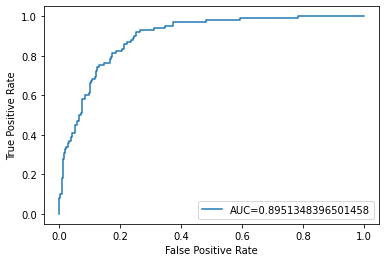

In [ ]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test,  y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

let's try with only pfas

In [ ]:

#removing continuos 
intersection_set = set.intersection(set(df_PFAS.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [ ]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [ ]:
cols_to_drop

[]

In [ ]:
for i in df_PFAS.columns:
  if i.startswith('WT'):
    df_PFAS = df_PFAS.drop(columns=i)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_predict, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']
Y_test=test['LBDPFDEL']

In [ ]:
X_train

,SEQN,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,...,LBDBPBLC,LBDBCDSI,LBDBCDLC,LBDTHGSI,LBDTHGLC,LBDBSESI,LBDBSELC,LBDBMNSI,LBDBMNLC,LBDPFLLC
944,78044.0,0.5,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.4,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
1547,80929.0,1.0,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.4,...,0.0,5.250000,0.0,5.300000,0.0,2.300000,0.0,224.950000,0.0,0.0
748,77080.0,0.5,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.3,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
1844,82296.0,0.6,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,...,0.0,1.243725,1.0,2.230941,1.0,2.454443,0.0,203.895252,0.0,0.0
975,78185.0,0.3,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,79091.0,0.5,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,...,0.0,0.980000,0.0,3.400000,0.0,2.510000,0.0,152.880000,0.0,0.0
730,77004.0,7.6,0.0,0.10,0.0,0.07,1.0,0.07,1.0,0.7,...,0.0,3.200000,0.0,3.800000,0.0,2.660000,0.0,282.460000,0.0,0.0
581,76301.0,2.0,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,...,0.0,1.243725,1.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
66,73873.0,1.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.7,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict_proba(X_test)
predictions = [round(value) for value in y_pred[:,1]]
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)

0.8755760368663594


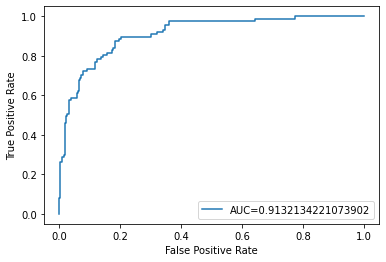

In [ ]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test,  y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
X_train

,SEQN,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,...,LBDBPBLC,LBDBCDSI,LBDBCDLC,LBDTHGSI,LBDTHGLC,LBDBSESI,LBDBSELC,LBDBMNSI,LBDBMNLC,LBDPFLLC
944,78044.0,0.5,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.4,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
1547,80929.0,1.0,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.4,...,0.0,5.250000,0.0,5.300000,0.0,2.300000,0.0,224.950000,0.0,0.0
748,77080.0,0.5,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.3,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
1844,82296.0,0.6,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,...,0.0,1.243725,1.0,2.230941,1.0,2.454443,0.0,203.895252,0.0,0.0
975,78185.0,0.3,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,79091.0,0.5,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,...,0.0,0.980000,0.0,3.400000,0.0,2.510000,0.0,152.880000,0.0,0.0
730,77004.0,7.6,0.0,0.10,0.0,0.07,1.0,0.07,1.0,0.7,...,0.0,3.200000,0.0,3.800000,0.0,2.660000,0.0,282.460000,0.0,0.0
581,76301.0,2.0,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,...,0.0,1.243725,1.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
66,73873.0,1.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.7,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0


#Stepwise Logistic Regression loop - don't run unless you want to wait around for awhile

In [ ]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS.drop(columns = 'WTSB2YR')
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

Loop runs successfully (had to include a try/except clause for singular matrices) but eventually only returns function value of 'inf'
<br>
Max iterations reached 

In [ ]:
# pseudo code : 
# L = list of all variables not yet included
# I = list of currently included variables (possibly empty at outset)
# compute BIC based on I

# while True : 
  # for x in L :
    # J = I U {x}
    # compute BIC based on J - BIC_J
    # if BIC_J < BIC:
      # flag = 1
      # best_x = x
      # BIC = BIC_J
  # if flag = 0:
    # break
  # else : 
    # I = I U Best_x
    # L = L \ Best_x


# stepwise regression starting with PFAS chemicals already in dataframe : 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_PFAS, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']  # Perfluorodecanoic acid comment (binary)
Y_test=test['LBDPFDEL']

# set BIC to the BIC from regression with only PFAS chemicals :
log_reg=sm.Logit(Y_train,X_train).fit()
loglik =log_reg.llf
#BIC calculation (math.log with one arguement is natural log)
BIC = (1 * math.log(len(Y_test))) - (2 * loglik)

# Create new test / train sets with all chemicals (not just PFAS)
train, test = train_test_split(df_predict, test_size=0.2)     # use df_predict instead of df_PFAS 
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']  # Perfluorodecanoic acid comment (binary)
Y_test=test['LBDPFDEL']

# prepare list variables for loop
L = include                                                            # list of variables not yet included 
I = df_PFAS.drop(columns = ['LBDPFDEL','LBXPFDE', 'WTSB2YR'])  # list of variables included at outset
causes_error = []

# ---- loop starts below 
import numpy as np

while True:
  for x in L:
    J = I
    J[x] = df_predict[x]
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J.columns]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      pass
    if BIC_J < BIC:
      flag = 1
      best_x = x
      BIC = BIC_J
  if flag == 0 :
    break
  else : 
    I[best_x] = df_predict[best_x]
    print(I.columns, len(I.columns))
    if best_x in L:
      L.remove(best_x)


Optimization terminated successfully.
         Current function value: 0.343899
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.350851
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.350851
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.350851
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.350851
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.350851
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.350851
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.350851
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.350851
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.348113
         Iterations: 35
         Current function value: 0.348045
         Iterations: 35
         Current function value: 0.347013
         Iterations: 35
         Current function value: 0.346754
         Iterations: 35
         Current function value: 0.346754
         Iterations: 35
         Current function value: 0.346647
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.346506
         Iterations 33
         Current function value: inf
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Streaming output truncated to the last 5000 lines.
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         Current function value: inf
         Iterations: 35
         C

#^ looking at the last few print outs, it seems like it keeps returning that it is at the point where it has 95 features

In [ ]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS.drop(columns = 'WTSB2YR')
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [ ]:
import statsmodels.api as sm
import math

In [ ]:

# stepwise regression starting with PFAS chemicals already in dataframe : 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_PFAS, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']  # Perfluorodecanoic acid comment (binary)
Y_test=test['LBDPFDEL']

# set BIC to the BIC from regression with only PFAS chemicals :
log_reg=sm.Logit(Y_train,X_train).fit()
loglik =log_reg.llf
#BIC calculation (math.log with one arguement is natural log)
BIC = (1 * math.log(len(Y_test))) - (2 * loglik)

# Create new test / train sets with all chemicals (not just PFAS)
train, test = train_test_split(df_predict, test_size=0.2)     # use df_predict instead of df_PFAS 
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']  # Perfluorodecanoic acid comment (binary)
Y_test=test['LBDPFDEL']

#FORGOT TO DEFINE INCLUDE
include=list(X_train.columns)

# prepare list variables for loop
L = include                                                            # list of variables not yet included 
I = df_PFAS.drop(columns = ['LBDPFDEL','LBXPFDE', 'WTSB2YR'])  # list of variables included at outset
causes_error = []

Optimization terminated successfully.
         Current function value: 0.306446
         Iterations 14


In [ ]:
len(I)

2168

the loop is quitting way too early, this is a bit strange

In [ ]:
len(L)

96

Breaking down the loop part by part to troubleshoot

#Stepwise Logistic Regression loop debugging breakdown-DON'T RUN There are endless while loops in here
I did this very much in my own little world and it is very disorganized in terms of run order. DON'T RUN, just look at comments and text boxes. just ask chloe any clarifing q's

In [ ]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS.drop(columns = 'WTSB2YR')
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

good

Loop runs successfully (had to include a try/except clause for singular matrices) but eventually only returns function value of 'inf'
<br>
Max iterations reached 

In [ ]:
# stepwise regression starting with PFAS chemicals already in dataframe : 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_PFAS, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']  # Perfluorodecanoic acid comment (binary)
Y_test=test['LBDPFDEL']


good

In [ ]:
# set BIC to the BIC from regression with only PFAS chemicals :
import statsmodels.api as sm
import math
log_reg=sm.Logit(Y_train,X_train).fit()
loglik =log_reg.llf
#BIC calculation (math.log with one arguement is natural log)
BIC = (1 * math.log(len(Y_test))) - (2 * loglik)
print(BIC)

Optimization terminated successfully.
         Current function value: 0.353191
         Iterations 12
1230.9408704321663


good

In [ ]:
# Create new test / train sets with all chemicals (not just PFAS)
train, test = train_test_split(df_predict, test_size=0.2)     # use df_predict instead of df_PFAS 
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']  # Perfluorodecanoic acid comment (binary)
Y_test=test['LBDPFDEL']


good

In [ ]:
# pseudo code : 
# L = list of all variables not yet included
# I = list of currently included variables (possibly empty at outset)
# compute BIC based on I

# while True : 
  # for x in L :
    # J = I U {x}
    # compute BIC based on J - BIC_J
    # if BIC_J < BIC:
      # flag = 1
      # best_x = x
      # BIC = BIC_J
  # if flag = 0:
    # break
  # else : 
    # I = I U Best_x
    # L = L \ Best_x

In [ ]:
#old
# prepare list variables for loop
include=list(X_train.columns)
L = include                                                            # list of variables not yet included 
I = df_PFAS.drop(columns = ['LBDPFDEL','LBXPFDE', 'WTSB2YR'])  # list of variables included at outset
causes_error = []
print(type(L))
print(L)
print(type(I))

<class 'list'>
['SEQN', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH', 'LBDMPAHL', 'LBXPFBS', 'LBDPFBSL', 'LBXPFHP', 'LBDPFHPL', 'LBXPFNA', 'LBDPFNAL', 'LBXPFUA', 'LBDPFUAL', 'LBXPFDO', 'LBDPFDOL', 'LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC', 'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC', 'LBDVBMLC', 'LBDVBZLC', 'LBDVC6LC', 'LBDVCBLC', 'LBDVCFLC', 'LBDVCMLC', 'LBDVCTLC', 'LBDVDBLC', 'LBDVDELC', 'LBDVEELC', 'LBDVDXLC', 'LBDVEALC', 'LBDVEBLC', 'LBDVECLC', 'LBDVFNLC', 'LBDVIPLC', 'LBDVMCLC', 'LBDVMELC', 'LBDVMPLC', 'LBDVNBLC', 'LBDVOXLC', 'LBDVTCLC', 'LBDVTELC', 'LBDVFTLC', 'LBDVHTLC', 'LBDVTOLC', 'LBDVTPLC', 'LBDVVBLC', 'LBDVXYLC', 'URXUCR_x', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMHPLC', 'URDMIBLC', 'URDMNPLC', 'URDMOHLC', 'URDMZPLC', 'URDBP3LC', 'URDBPHLC', 'URDBPFLC', 'URDBPSLC', 'URDTLCLC', 'URDTRSLC', 'URDBUPLC', 'URDEPBLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URXUCR_y', 'LBDIHGSI', 'LBDIHGLC',

not good, I is a dataframe not a list, let's make it a list

In [ ]:
#new fix
# prepare list variables for loop
include=list(X_train.columns)
L = include                                                            # list of variables not yet included 
I = df_PFAS.drop(columns = ['LBDPFDEL','LBXPFDE', 'WTSB2YR'])  # list of variables included at outset
I=list(I.columns)
causes_error = []


In [ ]:
#test it out
print(type(L))
print(L)
print(type(I))
print(I)

<class 'list'>
['SEQN', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH', 'LBDMPAHL', 'LBXPFBS', 'LBDPFBSL', 'LBXPFHP', 'LBDPFHPL', 'LBXPFNA', 'LBDPFNAL', 'LBXPFUA', 'LBDPFUAL', 'LBXPFDO', 'LBDPFDOL', 'LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC', 'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC', 'LBDVBMLC', 'LBDVBZLC', 'LBDVC6LC', 'LBDVCBLC', 'LBDVCFLC', 'LBDVCMLC', 'LBDVCTLC', 'LBDVDBLC', 'LBDVDELC', 'LBDVEELC', 'LBDVDXLC', 'LBDVEALC', 'LBDVEBLC', 'LBDVECLC', 'LBDVFNLC', 'LBDVIPLC', 'LBDVMCLC', 'LBDVMELC', 'LBDVMPLC', 'LBDVNBLC', 'LBDVOXLC', 'LBDVTCLC', 'LBDVTELC', 'LBDVFTLC', 'LBDVHTLC', 'LBDVTOLC', 'LBDVTPLC', 'LBDVVBLC', 'LBDVXYLC', 'URXUCR_x', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMHPLC', 'URDMIBLC', 'URDMNPLC', 'URDMOHLC', 'URDMZPLC', 'URDBP3LC', 'URDBPHLC', 'URDBPFLC', 'URDBPSLC', 'URDTLCLC', 'URDTRSLC', 'URDBUPLC', 'URDEPBLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URXUCR_y', 'LBDIHGSI', 'LBDIHGLC',

good

In [ ]:
#for x in L:
#  J = I
#  J[x] = df_predict[x]

not good, now that we fixed it to be a list, treating a list like a dictionary, and not matching pseudo code.

In [ ]:
#new fix
#iterating over the include list
for x in L:
  J = I + [x] #union of the lists

In [ ]:
#checking
check = {}#empty dictionary to hold truth values
for x in L:
  J = I + [x] #union of the lists
  check[x]=((J[-1]==x) and len(J)==len(I)+1) #checking that only the right one has been added. putting the truth value in a dictionary
print(False in check) #if this prints False, we are good to go

False


good

In [ ]:
for x in L:
  J = I + [x] #changed to union of the lists
  try:
    log_reg_J = sm.Logit(Y_train, X_train[J]).fit()#changed to be treating J like a list
    loglik_J = log_reg_J.llf
    BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    print(loglik_J, BIC_J)
  except:                                                   #np.linalg.LinAlgError("Singular matrix")
    causes_error.append(x)
    pass

not good, J should be a list, not a dataframe, also we have to remember to run our impute cell above before splitting or drop na so that there no nans.

In [ ]:
print(causes_error)

['SEQN', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH', 'LBDMPAHL', 'LBXPFBS', 'LBDPFBSL', 'LBXPFHP', 'LBDPFHPL', 'LBXPFNA', 'LBDPFNAL', 'LBXPFUA', 'LBDPFUAL', 'LBXPFDO', 'LBDPFDOL', 'LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC', 'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC', 'LBDVBMLC', 'LBDVBZLC', 'LBDVC6LC', 'LBDVCBLC', 'LBDVCFLC', 'LBDVCMLC', 'LBDVCTLC', 'LBDVDBLC', 'LBDVDELC', 'LBDVEELC', 'LBDVDXLC', 'LBDVEALC', 'LBDVEBLC', 'LBDVECLC', 'LBDVFNLC', 'LBDVIPLC', 'LBDVMCLC', 'LBDVMELC', 'LBDVMPLC', 'LBDVNBLC', 'LBDVOXLC', 'LBDVTCLC', 'LBDVTELC', 'LBDVFTLC', 'LBDVHTLC', 'LBDVTOLC', 'LBDVTPLC', 'LBDVVBLC', 'LBDVXYLC', 'URXUCR_x', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMHPLC', 'URDMIBLC', 'URDMNPLC', 'URDMOHLC', 'URDMZPLC', 'URDBP3LC', 'URDBPHLC', 'URDBPFLC', 'URDBPSLC', 'URDTLCLC', 'URDTRSLC', 'URDBUPLC', 'URDEPBLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URXUCR_y', 'LBDIHGSI', 'LBDIHGLC', 'LBDBGELC', 'L

they are all singular

In [ ]:
#Checking if I itself is singular by seeing if removing any feature will still result in full row rank
I=df_PFAS.drop(columns = ['LBDPFDEL','LBXPFDE', 'WTSB2YR'])
I=list(I.columns)
print(np.linalg.matrix_rank(X_train[I]))
for y in I:
  I=df_PFAS.drop(columns = ['LBDPFDEL','LBXPFDE', 'WTSB2YR'])
  I=list(I.columns)
  I.remove(y)
  print(np.linalg.matrix_rank(X_train[I]))

15
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14


okay so I itself is nonsingular



In [ ]:
#Checking if L itself is singular by seeing if removing any feature will still result in full row rank
#made dictionary instead of printing out because too much variation to easily tell visually
L = include 
ranks={}
Lfullrank=np.linalg.matrix_rank(X_train[L])
for y in L:
  L = include 
  L.remove(y)
  ranks[y]=(np.linalg.matrix_rank(X_train[L])==Lfullrank)
print(False in check) #if this prints False, we are good to go

False


okay so L itself is nonsingular, something is happening between the lists

In [ ]:
for x in L:
  J = I + [x]
  rankJ = np.linalg.matrix_rank(X_train[J]) #85
  for y in J:
    J=I+[x]
    J.remove(y)
    if np.linalg.matrix_rank(X_train[J])==rankJ:
      print(y,x)



SEQN SEQN
SEQN SEQN
LBXPFHS LBXPFHS
LBXPFHS LBXPFHS
LBDPFHSL LBDPFHSL
LBDPFHSL LBDPFHSL
LBXMPAH LBXMPAH
LBXMPAH LBXMPAH
LBDMPAHL LBDMPAHL
LBDMPAHL LBDMPAHL
LBXPFBS LBXPFBS
LBXPFBS LBXPFBS
LBDPFBSL LBDPFBSL
LBDPFBSL LBDPFBSL
LBXPFHP LBXPFHP
LBXPFHP LBXPFHP
LBDPFHPL LBDPFHPL
LBDPFHPL LBDPFHPL
LBXPFNA LBXPFNA
LBXPFNA LBXPFNA
LBDPFNAL LBDPFNAL
LBDPFNAL LBDPFNAL
LBXPFUA LBXPFUA
LBXPFUA LBXPFUA
LBDPFUAL LBDPFUAL
LBDPFUAL LBDPFUAL
LBXPFDO LBXPFDO
LBXPFDO LBXPFDO
LBDBPBLC LBDBPBLC
LBDBSELC LBDBSELC
LBDBMNLC LBDBMNLC


the output above is showing us that we have repeated columns, we need to fix this in our definition of the list L to make sure there aren't repeats

In [ ]:
L = include 
for i in L:
  if i in I:
    L.remove(i)
L

['LBXPFHS',
 'LBXMPAH',
 'LBXPFBS',
 'LBXPFHP',
 'LBXPFNA',
 'LBXPFUA',
 'LBXPFDO',
 'LBD2DFLC',
 'LBD4CELC',
 'LBDV06LC',
 'LBDV07LC',
 'LBDV08LC',
 'LBDV1DLC',
 'LBDV2ALC',
 'LBDV3BLC',
 'LBDV4CLC',
 'LBDVBFLC',
 'LBDVBMLC',
 'LBDVBZLC',
 'LBDVC6LC',
 'LBDVCBLC',
 'LBDVCFLC',
 'LBDVCMLC',
 'LBDVCTLC',
 'LBDVDBLC',
 'LBDVDELC',
 'LBDVEELC',
 'LBDVDXLC',
 'LBDVEALC',
 'LBDVEBLC',
 'LBDVECLC',
 'LBDVFNLC',
 'LBDVIPLC',
 'LBDVMCLC',
 'LBDVMELC',
 'LBDVMPLC',
 'LBDVNBLC',
 'LBDVOXLC',
 'LBDVTCLC',
 'LBDVTELC',
 'LBDVFTLC',
 'LBDVHTLC',
 'LBDVTOLC',
 'LBDVTPLC',
 'LBDVVBLC',
 'LBDVXYLC',
 'URXUCR_x',
 'URDCNPLC',
 'URDCOPLC',
 'URDECPLC',
 'URDMBPLC',
 'URDMC1LC',
 'URDMEPLC',
 'URDMHHLC',
 'URDMCHLC',
 'URDMHPLC',
 'URDMIBLC',
 'URDMNPLC',
 'URDMOHLC',
 'URDMZPLC',
 'URDBP3LC',
 'URDBPHLC',
 'URDBPFLC',
 'URDBPSLC',
 'URDTLCLC',
 'URDTRSLC',
 'URDBUPLC',
 'URDEPBLC',
 'URDMPBLC',
 'URDPPBLC',
 'URD14DLC',
 'URDDCBLC',
 'URXUCR_y',
 'LBDIHGSI',
 'LBDIHGLC',
 'LBDBGELC',
 'LBDBGMLC',
 'LBDB

In [ ]:
for x in L:
  J = I + [x] #changed to union of the lists
  try:
    log_reg_J = sm.Logit(Y_train, X_train[J]).fit()#changed to be treating J like a list
    loglik_J = log_reg_J.llf
    BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    print(loglik_J, BIC_J)
  except:                                                   #np.linalg.LinAlgError("Singular matrix")
    causes_error.append(x)
    pass

Optimization terminated successfully.
         Current function value: 0.337838
         Iterations 14
-585.8108263800443 1177.6946972941892
Optimization terminated successfully.
         Current function value: 0.337838
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.337838
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.337838
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.337838
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.337838
         Iterations 14
-585.8108263800443 1177.6946972941892
Optimization terminated successfully.
         Current function value: 0.337838
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.337838
         Iterations 14
-585.8106361811194 1177.6943168963394
Optimization terminated successfully.
         Current functio

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 1173.9233327596394
Optimization terminated successfully.
         Current function value: 0.337805
         Iterations 14
-585.7541119422597 1177.5812684186199
Optimization terminated successfully.
         Current function value: 0.337724
         Iterations 14
-585.6136726566476 1177.3003898473958
         Current function value: 0.336735
         Iterations: 35
-583.8981247398473 1173.869294013795
Optimization terminated successfully.
         Current function value: 0.337838
         Iterations 14
-585.8106521776914 1177.6943488894833


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.337745
         Iterations 14
-585.6502545060745 1177.3735535462495
Optimization terminated successfully.
         Current function value: 0.337756
         Iterations 14
-585.6680380439395 1177.4091206219796
Optimization terminated successfully.
         Current function value: 0.337812
         Iterations 14
-585.7663885735085 1177.6058216811175
Optimization terminated successfully.
         Current function value: 0.337786
         Iterations 14
-585.7206621301132 1177.5143687943269
Optimization terminated successfully.
         Current function value: 0.337512
         Iterations 14
-585.2463056418883 1176.565655817877
Optimization terminated successfully.
         Current function value: 0.337526
         Iterations 14
-585.2695088658152 1176.6120622657309
Optimization terminated successfully.
         Current function value: 0.337084
         Iterations 14
-584.5028654899429 1175.0787755139863
Optimization t

In [ ]:
causes_error 
#checked them all with
#log_reg_J = sm.Logit(Y_train, X_train[J+['EACH CHEMICAL INDIVIDUALY']]).fit()
#All were singular matrix issues

['LBXMPAH',
 'LBXPFBS',
 'LBXPFHP',
 'LBXPFNA',
 'LBXPFDO',
 'LBDBPBLC',
 'LBDBSELC',
 'LBDBMNLC']

In [ ]:

# ---- loop starts below 
import numpy as np

while True:
  for x in L:
    J = I + [x] #changed to union of the lists
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      pass
    if BIC_J < BIC:
      flag = 1
      best_x = x
      BIC = BIC_J
  if flag == 0 :
    break
  else : 
    I[best_x] = df_predict[best_x]
    print(I.columns, len(I.columns))
    if best_x in L:
      L.remove(best_x)


NameError: ignored

In [ ]:

# ---- loop starts below 
import numpy as np

while True:
  for x in L:
    J = I + [x] #changed to union of the lists
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      pass
    if BIC_J < BIC:
      flag = 1
      best_x = x
      BIC = BIC_J
  if flag == 0 :
    break
  else : 
    I[best_x] = df_predict[best_x]
    print(I.columns, len(I.columns))
    if best_x in L:
      L.remove(best_x)


TypeError: ignored

not good, treating I like a dictionary, and not matching pseudocode

In [ ]:

# ---- loop starts below 
import numpy as np

while True:
  for x in L:
    J = I + [x] #changed to union of the lists
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      pass
    if BIC_J < BIC:
      flag = 1
      best_x = x
      BIC = BIC_J
  if flag == 0 :
    break
  else : 
    I = df_predict[best_x]
    print(I.columns, len(I.columns))
    if best_x in L:
      L.remove(best_x)


AttributeError: ignored

In [ ]:
# ---- loop starts below 
import numpy as np

while True:
  for x in L:
    J = I + [x] #changed to union of the lists
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      pass
    if BIC_J < BIC:
      flag = 1
      best_x = x
      BIC = BIC_J
  if flag == 0 :
    break
  else : 
    I = df_predict[best_x]
    print(I, len(I))
    if best_x in L:
      L.remove(best_x)


UFuncTypeError: ignored

In [ ]:
# pseudo code : 
# L = list of all variables not yet included
# I = list of currently included variables (possibly empty at outset)
# compute BIC based on I

# while True : 
  # for x in L :
    # J = I U {x}
    # compute BIC based on J - BIC_J
    # if BIC_J < BIC:
      # flag = 1
      # best_x = x
      # BIC = BIC_J
  # if flag = 0:
    # break
  # else : 
    # I = I U Best_x
    # L = L \ Best_x

let's try putting it in the try loop

In [ ]:
# ---- loop starts below 
import numpy as np

while True:
  for x in L:
    J = I + [x] #changed to union of the lists
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
      if BIC_J < BIC:
        flag = 1
        best_x = x
        BIC = BIC_J
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      pass
  if flag == 0 :
    break
  else : 
    I = df_predict[best_x]
    print(I.columns, len(I.columns))
    if best_x in L:
      L.remove(best_x)

There's no way it was that simple... let's put a print statement

In [ ]:
# ---- loop starts below 
import numpy as np

while True:
  for x in L:
    J = I + [x] #changed to union of the lists
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
      if BIC_J < BIC:
        flag = 1
        best_x = x
        BIC = BIC_J
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      print("nice try")
      pass
  if flag == 0 :
    print("nice try 2")
    break
  else : 
    I[best_x] = df_predict[best_x]
    print(I.columns, len(I.columns))
    if best_x in L:
      L.remove(best_x)

nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try
nice try 2


on we go in debugging land

let's try where we get rid of the causes errors and stop using try and except

In [ ]:
causes_error=[]
for x in L:
  J = I + [x] #changed to union of the lists
  try:
    log_reg_J = sm.Logit(Y_train, X_train[J]).fit()#changed to be treating J like a list
    loglik_J = log_reg_J.llf
    BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
  except:                                                   #np.linalg.LinAlgError("Singular matrix")
    causes_error.append(x)
    pass

In [ ]:
causes_error

['LBXPFHS',
 'LBXPFBS',
 'LBXPFHP',
 'LBXPFNA',
 'LBXPFDO',
 'LBD4CELC',
 'LBDV1DLC',
 'LBDV3BLC',
 'LBDVCTLC',
 'LBDVDELC',
 'LBDVDXLC',
 'LBDVNBLC',
 'LBDVFTLC',
 'LBDVVBLC',
 'LBDBPBLC',
 'LBDBSELC',
 'LBDBMNLC']

In [ ]:
for i in causes_error:
  if i in L:
    L.remove(i)

In [ ]:
print(len(L))
L

88


['LBXPFHS',
 'LBXMPAH',
 'LBXPFBS',
 'LBXPFHP',
 'LBXPFNA',
 'LBXPFUA',
 'LBXPFDO',
 'LBD2DFLC',
 'LBD4CELC',
 'LBDV06LC',
 'LBDV07LC',
 'LBDV08LC',
 'LBDV1DLC',
 'LBDV2ALC',
 'LBDV3BLC',
 'LBDV4CLC',
 'LBDVBFLC',
 'LBDVBMLC',
 'LBDVBZLC',
 'LBDVC6LC',
 'LBDVCBLC',
 'LBDVCFLC',
 'LBDVCMLC',
 'LBDVCTLC',
 'LBDVDBLC',
 'LBDVDELC',
 'LBDVEELC',
 'LBDVDXLC',
 'LBDVEALC',
 'LBDVEBLC',
 'LBDVECLC',
 'LBDVFNLC',
 'LBDVIPLC',
 'LBDVMCLC',
 'LBDVMELC',
 'LBDVMPLC',
 'LBDVNBLC',
 'LBDVOXLC',
 'LBDVTCLC',
 'LBDVTELC',
 'LBDVFTLC',
 'LBDVHTLC',
 'LBDVTOLC',
 'LBDVTPLC',
 'LBDVVBLC',
 'LBDVXYLC',
 'URXUCR_x',
 'URDCNPLC',
 'URDCOPLC',
 'URDECPLC',
 'URDMBPLC',
 'URDMC1LC',
 'URDMEPLC',
 'URDMHHLC',
 'URDMCHLC',
 'URDMHPLC',
 'URDMIBLC',
 'URDMNPLC',
 'URDMOHLC',
 'URDMZPLC',
 'URDBP3LC',
 'URDBPHLC',
 'URDBPFLC',
 'URDBPSLC',
 'URDTLCLC',
 'URDTRSLC',
 'URDBUPLC',
 'URDEPBLC',
 'URDMPBLC',
 'URDPPBLC',
 'URD14DLC',
 'URDDCBLC',
 'URXUCR_y',
 'LBDIHGSI',
 'LBDIHGLC',
 'LBDBGELC',
 'LBDBGMLC',
 'LBDB

we still have a good amount to look at

In [ ]:
# ---- loop starts below 
import numpy as np

while True:
  for x in L:
    J = I + [x] #changed to union of the lists
    log_reg_J = sm.Logit(Y_train, X_train[J]).fit()
    loglik_J = log_reg_J.llf
    BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    if BIC_J < BIC:
      flag = 1
      best_x = x
      BIC = BIC_J
  if flag == 0 :
    break
  else : 
    I[best_x] = df_predict[best_x]
    print(I.columns, len(I.columns))
    if best_x in L:
      L.remove(best_x)

Optimization terminated successfully.
         Current function value: 0.350754
         Iterations 14


LinAlgError: ignored

UGHHHHHHHH, that was a stupid decision, obviously what causes singular matrix errors will change between different steps

In [ ]:
# pseudo code : 
# L = list of all variables not yet included
# I = list of currently included variables (possibly empty at outset)
# compute BIC based on I

# while True : 
  # for x in L :
    # J = I U {x}
    # compute BIC based on J - BIC_J
    # if BIC_J < BIC:
      # flag = 1
      # best_x = x
      # BIC = BIC_J
  # if flag = 0:
    # break
  # else : 
    # I = I U Best_x
    # L = L \ Best_x

this isn't a working loop but it's the closest thing we have in my opinion

In [ ]:
import numpy as np

while True:
  for x in L:
    J = I + [x] #changed to union of the lists
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      pass
    if BIC_J < BIC:
      flag = 1
      best_x = x
      BIC = BIC_J
  if flag == 0 :
    break
  else : 
    I = df_predict[best_x]
    print(I, len(I))
    if best_x in L:
      L.remove(best_x)

UFuncTypeError: ignored

how is this even an issue

In [ ]:
# ---- loop starts below 
import numpy as np

while True:
  for x in L:
    J = list(set.union(I,x) #changed to union of the lists
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      pass
    if BIC_J < BIC:
      flag = 1
      best_x = x
      BIC = BIC_J
      print("made it to comparing BIC")
  if flag == 0 :
    break
  else : 
    I[best_x] = df_predict[best_x]
    print(I.columns, len(I.columns))
    if best_x in L:
      L.remove(best_x)

SyntaxError: ignored

this doesn't even make sense to me anymore, the only thing I can think of is that we hit a point where x is nothing because we have exausted the loop... let's break out of the pseduocode and make sure we aren't trying to loop beyond what is there

In [ ]:
import numpy as np

while True:
  for x in L:
    if type(x)== 'string':
      J = I + [x] #changed to union of the lists
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      pass
    if BIC_J < BIC:
      flag = 1
      best_x = x
      BIC = BIC_J
  if flag == 0 :
    break
  else : 
    I = df_predict[best_x]
    print(I, len(I))
    if best_x in L:
      L.remove(best_x)

Streaming output truncated to the last 5000 lines.
4       1.2
       ... 
2163    0.6
2164    3.2
2165    1.1
2166    1.4
2167    1.7
Name: LBXPFHS, Length: 2168, dtype: float64 2168
0       3.0
1       2.0
2       0.2
3       7.6
4       1.2
       ... 
2163    0.6
2164    3.2
2165    1.1
2166    1.4
2167    1.7
Name: LBXPFHS, Length: 2168, dtype: float64 2168
0       3.0
1       2.0
2       0.2
3       7.6
4       1.2
       ... 
2163    0.6
2164    3.2
2165    1.1
2166    1.4
2167    1.7
Name: LBXPFHS, Length: 2168, dtype: float64 2168
0       3.0
1       2.0
2       0.2
3       7.6
4       1.2
       ... 
2163    0.6
2164    3.2
2165    1.1
2166    1.4
2167    1.7
Name: LBXPFHS, Length: 2168, dtype: float64 2168
0       3.0
1       2.0
2       0.2
3       7.6
4       1.2
       ... 
2163    0.6
2164    3.2
2165    1.1
2166    1.4
2167    1.7
Name: LBXPFHS, Length: 2168, dtype: float64 2168
0       3.0
1       2.0
2       0.2
3       7.6
4       1.2
       ... 
2163    0.6
2164    

KeyboardInterrupt: ignored

This is obviously super broken reading the output

In [ ]:
import numpy as np
old_BIC= 170000000
while old_BIC>BIC:
  for x in L:
    if type(x)== 'string':
      J = I + [x] #changed to union of the lists
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      pass
    if BIC_J < BIC:
      flag = 1
      best_x = x
      old_BIC= BIC
      BIC = BIC_J
  if flag == 0 :
    break
  else : 
    I = df_predict[best_x]
    print(I, len(I))
    if best_x in L:
      L.remove(best_x)

Streaming output truncated to the last 5000 lines.
1       2.0
2       0.2
3       7.6
4       1.2
       ... 
2163    0.6
2164    3.2
2165    1.1
2166    1.4
2167    1.7
Name: LBXPFHS, Length: 2168, dtype: float64 2168
Optimization terminated successfully.
         Current function value: 0.336979
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.336979
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.336979
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.336979
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.336979
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.336979
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.336979
         Iterations 15
Optimization terminated successfully.
         Current func

still a broken

#new loop post debugging

In [ ]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS.drop(columns = 'WTSB2YR')
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [ ]:
# stepwise regression starting with PFAS chemicals already in dataframe : 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_PFAS, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']  # Perfluorodecanoic acid comment (binary)
Y_test=test['LBDPFDEL']

In [ ]:
# set BIC to the BIC from regression with only PFAS chemicals :
import statsmodels.api as sm
import math
log_reg=sm.Logit(Y_train,X_train).fit()
loglik =log_reg.llf
#BIC calculation (math.log with one arguement is natural log)
BIC = (1 * math.log(len(Y_test))) - (2 * loglik)
print(BIC)

Optimization terminated successfully.
         Current function value: 0.342223
         Iterations 12
1192.9021718493523


remember to make sure the imputation group was run before running below cells

In [ ]:
# Create new test / train sets with all chemicals (not just PFAS)
train, test = train_test_split(df_predict, test_size=0.2)     # use df_predict instead of df_PFAS 
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']  # Perfluorodecanoic acid comment (binary)
Y_test=test['LBDPFDEL']

In [ ]:
# prepare list variables for loop
include=list(X_train.columns)
L = include                                                            # list of variables not yet included 
I = df_PFAS.drop(columns = ['LBDPFDEL','LBXPFDE', 'WTSB2YR'])  # list of variables included at outset
I=list(I.columns)
causes_error = []

In [ ]:
#making sure there is no overlap in I and L
for i in L:
  if i in I:
    L.remove(i)
    print(i)
type(L)

SEQN
LBDPFHSL
LBDMPAHL
LBDPFBSL
LBDPFHPL
LBDPFNAL
LBDPFUAL
LBDPFDOL


list

In [ ]:
for x in L:
  J = I + [x] #changed to union of the lists
  try:
    log_reg_J = sm.Logit(Y_train, X_train[J]).fit()#changed to be treating J like a list
    loglik_J = log_reg_J.llf
    BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    print(loglik_J, BIC_J)
  except:                                                   #np.linalg.LinAlgError("Singular matrix")
    causes_error.append(x)
    pass

Optimization terminated successfully.
         Current function value: 0.336992
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.336992
         Iterations 15
-584.3440180345244 1174.7610806031494
Optimization terminated successfully.
         Current function value: 0.336992
         Iterations 15
-584.3440180345244 1174.7610806031494
Optimization terminated successfully.
         Current function value: 0.336992
         Iterations 15
-584.3440180345244 1174.7610806031494
Optimization terminated successfully.
         Current function value: 0.336992
         Iterations 15
-584.3440180345244 1174.7610806031494
Optimization terminated successfully.
         Current function value: 0.336992
         Iterations 15
-584.3440180345244 1174.7610806031494
Optimization terminated successfully.
         Current function value: 0.336992
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.336023
         

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))



         Current function value: 0.336909
         Iterations 15
-584.2010524812557 1174.475149496612
Optimization terminated successfully.
         Current function value: 0.336989
         Iterations 15
-584.3394460544342 1174.751936642969
Optimization terminated successfully.
         Current function value: 0.336752
         Iterations 15
-583.9275182669902 1173.928081068081
Optimization terminated successfully.
         Current function value: 0.336875
         Iterations 15
-584.1413014853078 1174.3556475047162
Optimization terminated successfully.
         Current function value: 0.336183
         Iterations 15
-582.9413386484084 1171.9557218309174
Optimization terminated successfully.
         Current function value: 0.336453
         Iterations 15
-583.4100907264394 1172.8932259869794
Optimization terminated successfully.
         Current function value: 0.336884
         Iterations 15
-584.1563530609537 1174.385750656008
Optimization terminated successfully.
         Current

backtrack to the x is type none issue

In [ ]:
import numpy as np

while True:
  for x in L:
    J = I + [x] #changed to union of the lists
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J.columns]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      pass
    if BIC_J < BIC:
      flag = 1
      best_x = x
      BIC = BIC_J
  if flag == 0 :
    break
  else : 
    I = df_predict[best_x]
    print(I, len(I))
    if best_x in L:
      L.remove(best_x)

0       3.0
1       2.0
2       0.2
3       7.6
4       1.2
       ... 
2163    0.6
2164    3.2
2165    1.1
2166    1.4
2167    1.7
Name: LBXPFHS, Length: 2168, dtype: float64 2168


UFuncTypeError: ignored

I don't even understand what could be wrong... are we using an imaginary X?

In [ ]:
import numpy as np

while True:
  for x in L:
    J = I + [x] #changed to union of the lists
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J.columns]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      pass
    if BIC_J < BIC:
      flag = 1
      best_x = x
      BIC = BIC_J
  if flag == 0 :
    break
  else : 
    I = df_predict[best_x]
    print(I, len(I))
    if best_x in L:
      L.remove(best_x)

#new loop Strategy: start with nothing at all

remember to make sure the imputation group was run before running below cells

In [ ]:
# Create new test / train sets with all chemicals (not just PFAS)
train, test = train_test_split(df_predict, test_size=0.2)     # use df_predict instead of df_PFAS 
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']  # Perfluorodecanoic acid comment (binary)
Y_test=test['LBDPFDEL']

In [ ]:
# prepare list variables for loop
include=list(X_train.columns)
L = include                                                            # list of variables not yet included 
I = []  # list of variables included at outset
causes_error = []

In [ ]:
for x in L:
  J = I + [x] #changed to union of the lists
  try:
    log_reg_J = sm.Logit(Y_train, X_train[J]).fit()#changed to be treating J like a list
    loglik_J = log_reg_J.llf
    BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    print(loglik_J, BIC_J)
  except:                                                   #np.linalg.LinAlgError("Singular matrix")
    causes_error.append(x)
    pass

Optimization terminated successfully.
         Current function value: 0.514037
         Iterations 4
-891.3405659784198 1788.7541764909402
Optimization terminated successfully.
         Current function value: 0.498846
         Iterations 7
-864.9996831288823 1736.0724107918652
Optimization terminated successfully.
         Current function value: 0.689719
         Iterations 6
-1195.973562983243 2398.0201705005866
Optimization terminated successfully.
         Current function value: 0.545638
         Iterations 7
-946.1368378996071 1898.3467203333148
Optimization terminated successfully.
         Current function value: 0.624068
         Iterations 5
-1082.133617817907 2170.3402801699144
Optimization terminated successfully.
         Current function value: 0.514884
         Iterations 5
-892.8093727787327 1791.691790091566
Optimization terminated successfully.
         Current function value: 0.517272
         Iterations 5
-896.9501734116475 1799.9733913573955
Optimization terminat

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687951
         Iterations: 35
-1192.9062993764708 2391.885643287042
Optimization terminated successfully.
         Current function value: 0.683879
         Iterations 6
-1185.8463007266391 2377.765645987379
Optimization terminated successfully.
         Current function value: 0.685338
         Iterations 5
-1188.3768697766413 2382.826784087383
Optimization terminated successfully.
         Current function value: 0.683022
         Iterations 6
-1184.3608618370454 2374.7947682081913
Optimization terminated successfully.
         Current function value: 0.625898
         Iterations 5
-1085.3066330927818 2176.686310719664
Optimization terminated successfully.
         Current function value: 0.674990
         Iterations 5
-1170.4326509661068 2346.938346466314
Optimization terminated successfully.
         Current function value: 0.584522
         Iterations 5
-1013.5618960865991 2033.1968367072986
Optimization terminated successfully.
         Current

In [ ]:
import numpy as np

while True:
  for x in L:
    J = I + [x] #changed to union of the lists
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J.columns]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      continue
    if BIC_J < BIC:
      flag = 1
      best_x = x
      BIC = BIC_J
  if flag == 0 :
    break
  else : 
    I = df_predict[best_x]
    print(I, len(I))
    if best_x in L:
      L.remove(best_x)

NameError: ignored

In [ ]:
# pseudo code : 
# L = list of all variables not yet included
# I = list of currently included variables (possibly empty at outset)
# compute BIC based on I

# while True : 
  # for x in L :
    # J = I U {x}
    # compute BIC based on J - BIC_J
    # if BIC_J < BIC:
      # flag = 1
      # best_x = x
      # BIC = BIC_J
  # if flag = 0:
    # break
  # else : 
    # I = I U Best_x
    # L = L \ Best_x

In [ ]:
import numpy as np

while True:
  for x in L:
    J = I + [x] #changed to union of the lists
    try:
      log_reg_J = sm.Logit(Y_train, X_train[J]).fit()
      loglik_J = log_reg_J.llf
      BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    except:                                                   #np.linalg.LinAlgError("Singular matrix")
      causes_error.append(x)
      continue
      if BIC_J < BIC:
         flag = 1
         best_x = x
         BIC = BIC_J
  if flag == 0 :
    break
  else : 
    I = df_predict[best_x]
    print(I, len(I))
    if best_x in L:
      L.remove(best_x)

NameError: ignored

maybe we need to stop doing try and except and just have a singular matrix function

In [ ]:
B=np.array([  1, 16,  6])
np.linalg.det(np.transpose(B[np.newaxis]) * B)

0.0

In [ ]:
A=X_train[include]

In [ ]:
A=A.to_numpy()

In [ ]:
display(A)

array([[7.89800000e+04, 3.90000000e+00, 0.00000000e+00, ...,
        1.02830000e+02, 0.00000000e+00, 1.00000000e+00],
       [7.69490000e+04, 1.20000000e+00, 0.00000000e+00, ...,
        2.03895252e+02, 0.00000000e+00, 1.00000000e+00],
       [7.47090000e+04, 7.00000000e-01, 0.00000000e+00, ...,
        2.03895252e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.34640000e+04, 2.00000000e-01, 0.00000000e+00, ...,
        5.97000000e+01, 0.00000000e+00, 0.00000000e+00],
       [7.38470000e+04, 1.70000000e+00, 0.00000000e+00, ...,
        1.41050000e+02, 0.00000000e+00, 0.00000000e+00],
       [8.06200000e+04, 8.00000000e-01, 0.00000000e+00, ...,
        1.54520000e+02, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
np.linalg.det(np.transpose(A[np.newaxis]) * A)

LinAlgError: ignored

In [ ]:
np.transpose(A[np.newaxis]) * A

array([[[6.23784040e+09, 3.08022000e+05, 0.00000000e+00, ...,
         8.12151340e+06, 0.00000000e+00, 7.89800000e+04],
        [5.92114860e+09, 9.23388000e+04, 0.00000000e+00, ...,
         1.56895357e+07, 0.00000000e+00, 7.69490000e+04],
        [5.58143468e+09, 5.22963000e+04, 0.00000000e+00, ...,
         1.52328104e+07, 0.00000000e+00, 0.00000000e+00],
        ...,
        [6.96623930e+09, 1.66928000e+04, 0.00000000e+00, ...,
         4.98280080e+06, 0.00000000e+00, 0.00000000e+00],
        [5.45337941e+09, 1.25539900e+05, 0.00000000e+00, ...,
         1.04161194e+07, 0.00000000e+00, 0.00000000e+00],
        [6.49958440e+09, 6.44960000e+04, 0.00000000e+00, ...,
         1.24574024e+07, 0.00000000e+00, 0.00000000e+00]],

       [[3.08022000e+05, 1.52100000e+01, 0.00000000e+00, ...,
         4.01037000e+02, 0.00000000e+00, 3.90000000e+00],
        [9.23388000e+04, 1.44000000e+00, 0.00000000e+00, ...,
         2.44674302e+02, 0.00000000e+00, 1.20000000e+00],
        [5.22963000e+04, 

In [ ]:
np.linalg.det(np.transpose(A[np.newaxis]) * A)

LinAlgError: ignored

In [ ]:
np.dim()

AttributeError: ignored

In [ ]:
(np.transpose(A[np.newaxis]) * A).shape

(96, 1734, 96)

In [ ]:
# ---- loop starts below 
import numpy as np

while True:
  for x in L:
    J = I + [x] #changed to union of the lists
    log_reg_J = sm.Logit(Y_train, X_train[J]).fit()
    loglik_J = log_reg_J.llf
    BIC_J = (1 * math.log(len(Y_test))) - (2 * loglik_J)
    if BIC_J < BIC:
      flag = 1
      best_x = x
      BIC = BIC_J
  if flag == 0 :
    break
  else : 
    I[best_x] = df_predict[best_x]
    print(I.columns, len(I.columns))
    if best_x in L:
      L.remove(best_x)

Optimization terminated successfully.
         Current function value: 0.514037
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.498846
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.689719
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545638
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.624068
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.514884
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.517272
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.517333
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.551818
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.404782
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.690094
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.684739
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.533184
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.554258
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.519663
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.659192
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581997
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1


LinAlgError: ignored

#PCA

In [ ]:
PCA_df=df_predict.dropna()

In [ ]:
display(PCA_df)

,SEQN,WTSB2YR,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,270133.488619,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.5,0.0,0.10,0.0,0.07,1.0
1,73571.0,138554.659645,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.3,0.0,0.07,1.0,0.07,1.0
2,73574.0,46186.186645,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,0.0,0.07,1.0,0.07,1.0
3,73576.0,37460.999852,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,0.6,0.0,0.07,1.0,0.10,0.0
4,73577.0,128174.418941,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,82946.684281,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.3,0.0,0.07,1.0,0.07,1.0
2334,83712.0,114681.392602,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0
2335,83713.0,49551.258249,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.5,0.0,0.50,0.0,0.30,0.0
2336,83717.0,29856.202622,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0


In [ ]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = PCA_df.columns[PCA_df.isin([0,1]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in PCA_df.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    PCA_df[col] = np.log(PCA_df[col])


In [ ]:
display(PCA_df)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,LBDBPBLC,LBDBCDSI,LBDBCDLC,LBDTHGSI,LBDTHGLC,LBDBSESI,LBDBSELC,LBDBMNSI,LBDBMNLC,LBDPFLLC
0,73568.0,-1.609438,0.0,1.098612,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,...,0.0,0.218111,0.0,0.802423,0.0,0.897900,0.0,5.317606,0.0,0.0
1,73571.0,-1.203973,0.0,0.693147,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,...,0.0,0.218111,0.0,0.802423,1.0,0.897900,0.0,5.317606,0.0,0.0
2,73574.0,-2.302585,0.0,-1.609438,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,...,0.0,0.218111,0.0,0.802423,0.0,0.897900,0.0,5.317606,0.0,0.0
3,73576.0,-1.609438,0.0,2.028148,0.0,-2.659260,1.0,-2.65926,1.0,-1.609438,...,0.0,0.218111,0.0,0.802423,0.0,0.897900,0.0,5.317606,0.0,0.0
4,73577.0,-2.302585,0.0,0.182322,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,...,0.0,0.218111,0.0,0.802423,0.0,0.897900,0.0,5.317606,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,83711.0,-2.659260,1.0,-0.510826,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,...,0.0,0.218111,0.0,0.802423,0.0,0.897900,0.0,5.317606,0.0,0.0
2164,83712.0,-1.609438,0.0,1.163151,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,...,0.0,-0.116534,0.0,0.000000,1.0,0.765468,0.0,4.678049,0.0,0.0
2165,83713.0,-0.105361,0.0,0.095310,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,...,0.0,0.218111,1.0,0.802423,0.0,0.897900,0.0,5.317606,0.0,0.0
2166,83717.0,-1.609438,0.0,0.336472,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,...,0.0,0.218111,0.0,0.802423,0.0,0.897900,0.0,5.317606,0.0,1.0


In [ ]:
# try using StandardScaler instead of taking logs? saw it on a website https://medium.com/district-data-labs/principal-component-analysis-with-python-4962cd026465 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_predict.drop(columns=['LBDPFDEL','LBXPFDE']))
scaled_data = scaler.transform(df_predict.drop(columns=['LBDPFDEL','LBXPFDE']))

In [ ]:
# eigen decomposition on covariance matrix 
cov_mat = np.cov(scaled_data.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.01609301  0.00265113  0.0260597  ...  0.          0.
   0.        ]
 [ 0.02290665  0.15923921 -0.0889478  ...  0.          0.
   0.        ]
 [-0.00879198 -0.07504172  0.18614705 ...  0.          0.
   0.        ]
 ...
 [-0.0033841  -0.09329514 -0.07550456 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]
 [-0.00964871  0.00480384 -0.02754185 ...  0.          0.
   0.        ]]

Eigenvalues 
[ 4.43023827e+00  2.63106251e+00  2.29619644e+00  2.23115450e+00
  2.10233270e+00  1.98886863e+00  1.85007013e+00  1.72573055e+00
 -2.69313794e-17  1.61972761e+00  1.54236797e+00  1.24175064e-01
  2.09727416e-01  2.65028794e-01  1.43931526e+00  1.40129863e+00
  1.36803420e+00  3.36850252e-01  3.67342881e-01  4.02531430e-01
  1.32656761e+00  1.30212281e+00  4.46617331e-01  1.27504292e+00
  1.25611761e+00  4.79775248e-01  4.94709611e-01  1.21241640e+00
  1.18228606e+00  1.18030101e+00  1.16239021e+00  1.15572791e+00
  5.2120

In [ ]:
pca = PCA()
pca.fit_transform(df_predict.drop(columns=['LBDPFDEL','LBXPFDE']))
print(pca.explained_variance_ratio_)

[9.98267597e-01 1.56007252e-03 1.62785345e-04 7.09324219e-06
 7.09696092e-07 5.65441379e-07 4.22111701e-07 7.36361945e-08
 3.88994318e-08 3.41269222e-08 3.23958148e-08 3.09350340e-08
 2.90822136e-08 2.78970185e-08 2.66219564e-08 2.59070556e-08
 2.43350753e-08 2.24039541e-08 2.18551849e-08 2.04669083e-08
 1.99035486e-08 1.98470307e-08 1.94691493e-08 1.77497096e-08
 1.73600956e-08 1.69197538e-08 1.66308627e-08 1.59400735e-08
 1.49887958e-08 1.45594112e-08 1.40595619e-08 1.26963857e-08
 1.23995822e-08 1.20175992e-08 1.16266554e-08 1.03540255e-08
 9.42331743e-09 8.36572995e-09 8.03335939e-09 6.99755834e-09
 6.24002996e-09 5.15338259e-09 4.72527440e-09 4.44023311e-09
 4.36402722e-09 3.68479533e-09 3.37455573e-09 3.14021722e-09
 2.54205606e-09 2.24544462e-09 2.18387051e-09 2.11506522e-09
 2.04669543e-09 1.85640358e-09 1.69359286e-09 1.58984070e-09
 1.40560005e-09 1.29775092e-09 1.25927946e-09 1.14605840e-09
 1.08011897e-09 1.06821890e-09 9.91868859e-10 8.96505328e-10
 7.78177683e-10 7.267214

In [ ]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = len(PCA_df.columns))
covar_matrix.fit(PCA_df)

PCA(n_components=98)

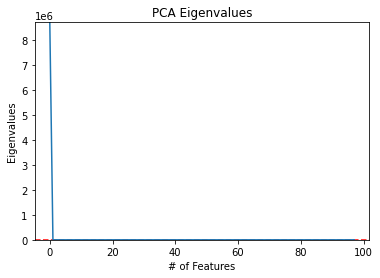

In [ ]:
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

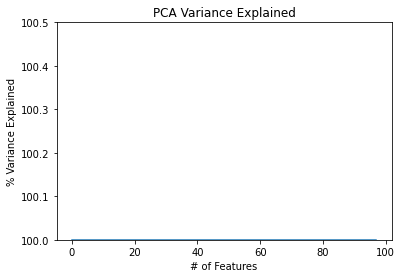

In [ ]:
variance = covar_matrix.explained_variance_ratio_ # calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var), 100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

#PCA–only continuous

In [ ]:
PCA_df=df_predict.dropna()

In [ ]:
display(PCA_df)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,LBDBPBLC,LBDBCDSI,LBDBCDLC,LBDTHGSI,LBDTHGLC,LBDBSESI,LBDBSELC,LBDBMNSI,LBDBMNLC,LBDPFLLC
76,73892.0,0.10,0.0,0.4,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,2.05,0.0,6.2,0.0,2.56,0.0,198.93,0.0,0.0
94,73968.0,0.20,0.0,3.1,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,1.42,0.0,4.0,0.0,2.50,0.0,148.51,0.0,0.0
111,74031.0,0.07,1.0,0.9,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.16,0.0,1.9,0.0,2.41,0.0,151.61,0.0,0.0
152,74233.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.51,0.0,1.6,0.0,2.39,0.0,453.36,0.0,0.0
197,74507.0,0.20,0.0,0.4,0.0,0.10,0.0,0.07,1.0,0.20,...,0.0,1.25,0.0,1.7,0.0,2.64,0.0,236.60,0.0,0.0
235,74682.0,0.10,0.0,3.5,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.25,0.0,1.7,0.0,2.48,0.0,139.78,0.0,1.0
239,74701.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,0.62,1.0,2.5,0.0,2.43,0.0,281.74,0.0,1.0
274,74886.0,0.20,0.0,1.0,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,0.62,1.0,3.5,0.0,2.69,0.0,167.44,0.0,0.0
387,75405.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.51,0.0,2.5,0.0,2.75,0.0,184.73,0.0,0.0
413,75570.0,0.07,1.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,0.62,1.0,1.7,0.0,2.56,0.0,287.20,0.0,0.0


In [ ]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = PCA_df.columns[PCA_df.isin([0,1]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in PCA_df.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    PCA_df[col] = np.log(PCA_df[col])
  else:
    PCA_df = PCA_df.drop(columns=col)


In [ ]:
display(PCA_df)

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO,URXUCR_x,URXUCR_y,LBDIHGSI,LBDBPBSI,LBDBCDSI,LBDTHGSI,LBDBSESI,LBDBMNSI
76,-2.302585,-0.916291,-1.609438,-2.65926,-2.659260,-0.510826,-2.659260,-1.609438,5.332719,5.332719,-0.051293,-3.540459,0.717840,1.824549,0.940007,5.292953
94,-1.609438,1.131402,-1.609438,-2.65926,-2.659260,-0.510826,-2.302585,-2.659260,5.762051,5.762051,-0.051293,-4.199705,0.350657,1.386294,0.916291,5.000652
111,-2.659260,-0.105361,-2.659260,-2.65926,-2.659260,-1.609438,-2.659260,-2.302585,5.505332,5.505332,-0.051293,-4.017384,0.148420,0.641854,0.879627,5.021311
152,-2.659260,-0.223144,-2.659260,-2.65926,-2.659260,-0.693147,-2.659260,-2.659260,4.304065,4.304065,-0.051293,-3.963316,0.412110,0.470004,0.871293,6.116687
197,-1.609438,-0.916291,-2.302585,-2.65926,-1.609438,-0.916291,-2.659260,-2.659260,5.746203,5.746203,-0.051293,-3.101093,0.223144,0.530628,0.970779,5.466371
235,-2.302585,1.252763,-2.659260,-2.65926,-2.659260,0.336472,-2.302585,-2.659260,4.584967,4.584967,-0.051293,-4.199705,0.223144,0.530628,0.908259,4.940070
239,-2.659260,-0.510826,-1.609438,-2.65926,-2.659260,-1.203973,-2.659260,-1.609438,5.099866,5.099866,0.530628,-4.268698,-0.478036,0.916291,0.887891,5.640985
274,-1.609438,0.000000,-2.659260,-2.65926,-2.659260,-0.916291,-2.659260,-2.659260,5.777652,5.777652,0.832909,-4.074542,-0.478036,1.252763,0.989541,5.120625
387,-2.659260,-0.693147,-2.659260,-2.65926,-2.659260,-0.356675,-2.659260,-2.659260,5.707110,5.707110,-0.051293,-4.199705,0.412110,0.916291,1.011601,5.218895
413,-2.659260,0.095310,-2.659260,-2.65926,-2.659260,-0.693147,-2.659260,-2.659260,4.762174,4.762174,-0.051293,-3.575551,-0.478036,0.530628,0.940007,5.660179


In [ ]:
# eigen decomposition on covariance matrix 
cov_mat = np.cov(PCA_df)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.15357883+0.j -0.20724151+0.j -0.0099042 +0.j ... -0.00492096+0.j
  -0.03580422+0.j -0.09336809+0.j]
 [ 0.15952677+0.j  0.13365996+0.j -0.0515539 +0.j ...  0.01512387+0.j
  -0.0208244 +0.j -0.01329297+0.j]
 [ 0.1607656 +0.j -0.05599914+0.j -0.00432843+0.j ... -0.21791058+0.j
   0.21058373+0.j  0.01864766+0.j]
 ...
 [ 0.1626157 +0.j -0.09196137+0.j -0.26375107+0.j ...  0.16965179+0.j
  -0.03879675+0.j -0.14314727+0.j]
 [ 0.14457602+0.j -0.2733947 +0.j -0.00527456+0.j ... -0.08746102+0.j
  -0.11912637+0.j  0.04740712+0.j]
 [ 0.15677371+0.j -0.03592747+0.j  0.26354282+0.j ...  0.08353254+0.j
  -0.16362324+0.j -0.0059634 +0.j]]

Eigenvalues 
[ 3.71932959e+02+0.00000000e+00j  2.78973997e+00+0.00000000e+00j
  1.54435908e+00+0.00000000e+00j  1.44931419e+00+0.00000000e+00j
  9.45186238e-01+0.00000000e+00j  6.62803239e-01+0.00000000e+00j
  5.11301651e-01+0.00000000e+00j  3.53646954e-01+0.00000000e+00j
  3.77226336e-01+0.00000000e+00j  2.63959703e-01+0.00000000e+00j
  1.6613141

In [ ]:
pca = PCA()
pca.fit_transform(PCA_df.drop(columns=['LBXPFDE']))
print(pca.explained_variance_ratio_)

[2.61929089e-01 2.06006724e-01 1.40955810e-01 1.18904192e-01
 8.63510695e-02 5.58271926e-02 4.07447251e-02 2.94610856e-02
 1.98941807e-02 1.90946921e-02 1.15672251e-02 7.65427095e-03
 1.60974399e-03 3.85347726e-34 3.10499058e-35]


In [ ]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = len(PCA_df.columns))
covar_matrix.fit(PCA_df)

PCA(n_components=16)

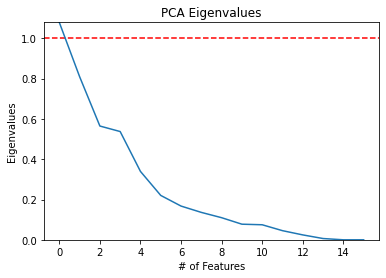

In [ ]:
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

maybe 8 or 10

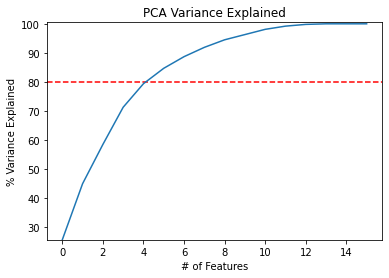

In [ ]:
variance = covar_matrix.explained_variance_ratio_ # calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var), 100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

maybe 4

In [ ]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 8)
covar_matrix.fit(PCA_df)

PCA(n_components=8)

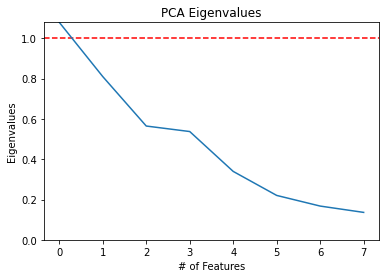

In [ ]:
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

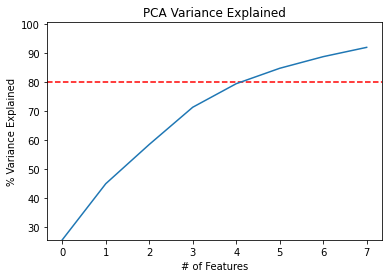

In [ ]:
variance = covar_matrix.explained_variance_ratio_ # calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var), 100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

try 4

In [ ]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 4)
covar_matrix.fit(PCA_df)

PCA(n_components=4)

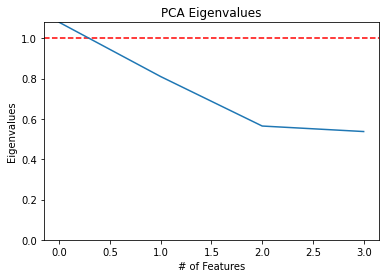

In [ ]:
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

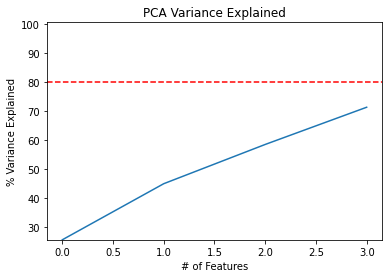

In [ ]:
variance = covar_matrix.explained_variance_ratio_ # calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var), 100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

#PCA-on only PFAS group

In [ ]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS.drop(columns = 'WTSB2YR')
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [ ]:
PCA_df=df_PFAS.dropna()

In [ ]:
display(PCA_df)

,SEQN,WTSB2YR,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,270133.488619,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.5,0.0,0.10,0.0,0.07,1.0
1,73571.0,138554.659645,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.3,0.0,0.07,1.0,0.07,1.0
2,73574.0,46186.186645,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,0.0,0.07,1.0,0.07,1.0
3,73576.0,37460.999852,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,0.6,0.0,0.07,1.0,0.10,0.0
4,73577.0,128174.418941,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,82946.684281,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.3,0.0,0.07,1.0,0.07,1.0
2334,83712.0,114681.392602,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0
2335,83713.0,49551.258249,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.5,0.0,0.50,0.0,0.30,0.0
2336,83717.0,29856.202622,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0


In [ ]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = PCA_df.columns[PCA_df.isin([0,1]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in PCA_df.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    PCA_df[col] = np.log(PCA_df[col])


In [ ]:
display(PCA_df)

,SEQN,WTSB2YR,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,12.506672,-1.609438,0.0,1.098612,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,-0.693147,0.0,-2.302585,0.0,-2.659260,1.0
1,73571.0,11.839020,-1.203973,0.0,0.693147,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,0.262364,0.0,-2.659260,1.0,-2.659260,1.0
2,73574.0,10.740436,-2.302585,0.0,-1.609438,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.356675,0.0,-2.659260,1.0,-2.659260,1.0
3,73576.0,10.531056,-1.609438,0.0,2.028148,0.0,-2.659260,1.0,-2.65926,1.0,-1.609438,0.0,-0.510826,0.0,-2.659260,1.0,-2.302585,0.0
4,73577.0,11.761147,-2.302585,0.0,0.182322,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.916291,0.0,-2.659260,1.0,-2.659260,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,11.325953,-2.659260,1.0,-0.510826,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,-1.203973,0.0,-2.659260,1.0,-2.659260,1.0
2334,83712.0,11.649913,-1.609438,0.0,1.163151,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.693147,0.0,-2.659260,1.0,-2.659260,1.0
2335,83713.0,10.810763,-0.105361,0.0,0.095310,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,0.405465,0.0,-0.693147,0.0,-1.203973,0.0
2336,83717.0,10.304148,-1.609438,0.0,0.336472,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,-0.223144,0.0,-2.659260,1.0,-2.659260,1.0


In [ ]:
# try using StandardScaler instead of taking logs? saw it on a website https://medium.com/district-data-labs/principal-component-analysis-with-python-4962cd026465 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_predict.drop(columns=['LBDPFDEL','LBXPFDE']))
scaled_data = scaler.transform(df_predict.drop(columns=['LBDPFDEL','LBXPFDE']))

In [ ]:
# eigen decomposition on covariance matrix 
cov_mat = np.cov(PCA_df.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.00000000e+00 -5.95392740e-06  3.88642001e-06 -6.60113817e-06
   3.34382753e-06  1.67043456e-06  3.77943822e-07 -1.06306698e-06
  -2.01235571e-06 -1.93519483e-06 -2.92008928e-07  2.07643104e-06
  -1.73189424e-06 -9.80130582e-08  1.00314288e-06  2.97455560e-07
  -4.19559442e-07 -2.37144821e-10]
 [-2.02984017e-06 -3.54005704e-02  2.48832449e-01 -3.92417193e-02
  -9.53959107e-01 -1.35501979e-01  6.30666606e-02 -2.51656179e-02
   4.17732408e-02 -1.76286483e-03 -1.76202140e-02 -1.15141702e-02
   3.52041367e-04  8.04993814e-03  1.21264708e-03 -4.64930345e-03
   2.54708385e-04  7.66257420e-04]
 [-3.03837132e-06  5.37146364e-01 -2.33244409e-01  1.22011988e-01
  -1.48602560e-01  9.94430686e-02 -2.77818250e-01  1.71929476e-01
  -5.18958515e-01 -3.09116295e-01 -3.25936294e-02  3.64967042e-01
  -1.13522828e-02  1.88076546e-02  6.07160801e-02  1.19281687e-02
   4.58951673e-03 -1.74205087e-03]
 [ 3.32809493e-06 -1.77812305e-01  2.55665314e-03  8.04269260e-03
   6.21503461e-02 -1.28

In [ ]:
scree_info=eig_vals/sum(eig_vals)
scree_info

array([9.99999420e-01, 2.17788779e-07, 1.02260831e-07, 7.43757155e-08,
       6.00150104e-08, 3.12025863e-08, 2.40423830e-08, 1.96801512e-08,
       1.53421101e-08, 1.14927820e-08, 9.17971532e-09, 6.31110623e-09,
       2.42440297e-09, 2.22928241e-09, 1.80198557e-09, 1.22229373e-09,
       4.13856365e-10, 8.75733537e-11])

In [ ]:
pca = PCA()
pca.fit_transform(PCA_df.drop(columns=['LBDPFDEL','LBXPFDE']))
print(pca.explained_variance_ratio_)

[9.99999519e-01 1.59253491e-07 9.41659030e-08 7.26552293e-08
 5.76922229e-08 3.07584738e-08 2.19129634e-08 1.79550674e-08
 9.47282209e-09 9.03886085e-09 2.43098308e-09 2.23484788e-09
 1.85569512e-09 1.22481246e-09 4.14365768e-10 8.76262095e-11]


In [ ]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = None)
covar_matrix.fit(PCA_df)

PCA()

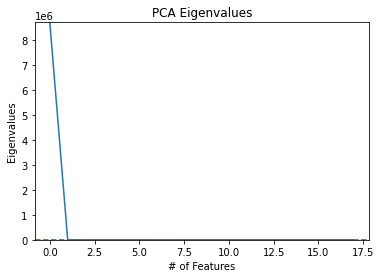

In [ ]:
import matplotlib.pyplot as plt 
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

elbow plot suggests 1 or 2

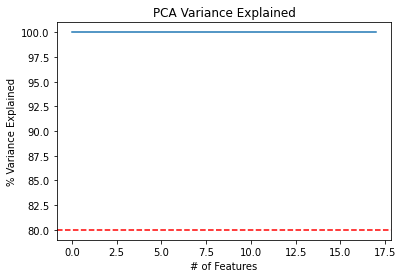

In [ ]:
variance = covar_matrix.explained_variance_ratio_ # calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
#plt.ylim(min(var), 100.1)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

after looking at elbow plots maybe 1 or two

In [ ]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 3)
covar_matrix.fit(PCA_df)

PCA(n_components=3)

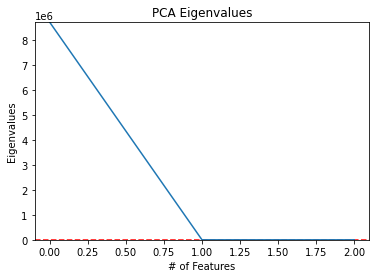

In [ ]:
import matplotlib.pyplot as plt 
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

definitely 1

#PCA PFAS continuous only

In [ ]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS.drop(columns = 'WTSB2YR')
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [ ]:
PCA_df=df_PFAS.dropna()
PCA_df=PCA_df.drop(columns='WTSB2YR')

In [ ]:
display(PCA_df)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.5,0.0,0.10,0.0,0.07,1.0
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.3,0.0,0.07,1.0,0.07,1.0
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,0.0,0.07,1.0,0.07,1.0
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,0.6,0.0,0.07,1.0,0.10,0.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.3,0.0,0.07,1.0,0.07,1.0
2334,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0
2335,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.5,0.0,0.50,0.0,0.30,0.0
2336,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0


In [ ]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = PCA_df.columns[PCA_df.isin([0.0,1.0]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in PCA_df.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    PCA_df[col] = np.log(PCA_df[col])
  else:
    PCA_df=PCA_df.drop(columns=col)


In [ ]:
display(PCA_df)

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,-1.609438,1.098612,-1.609438,-2.65926,-2.659260,-0.693147,-2.302585,-2.659260
1,-1.203973,0.693147,-1.609438,-2.65926,-2.659260,0.262364,-2.659260,-2.659260
2,-2.302585,-1.609438,-2.659260,-2.65926,-2.659260,-0.356675,-2.659260,-2.659260
3,-1.609438,2.028148,-2.659260,-2.65926,-1.609438,-0.510826,-2.659260,-2.302585
4,-2.302585,0.182322,-2.659260,-2.65926,-2.659260,-0.916291,-2.659260,-2.659260
...,...,...,...,...,...,...,...,...
2333,-2.659260,-0.510826,-1.609438,-2.65926,-2.659260,-1.203973,-2.659260,-2.659260
2334,-1.609438,1.163151,-2.659260,-2.65926,-2.659260,-0.693147,-2.659260,-2.659260
2335,-0.105361,0.095310,-2.659260,-2.65926,-2.659260,0.405465,-0.693147,-1.203973
2336,-1.609438,0.336472,-2.659260,-2.65926,-2.659260,-0.223144,-2.659260,-2.659260


In [ ]:
# eigen decomposition on covariance matrix 
cov_mat = np.cov(PCA_df.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-5.59741259e-01 -3.36320592e-01 -7.29874599e-02 -4.14519842e-03
  -2.13695519e-01 -4.23164019e-02 -7.20784270e-01  3.53187361e-02]
 [-4.50431797e-01  7.39872298e-01  3.95730910e-01 -2.61600492e-03
   2.66729309e-01  1.19635753e-02 -1.19521111e-01 -8.67031436e-02]
 [-1.52873008e-01  3.72224670e-01 -9.11959803e-01  8.51548762e-05
   7.40873640e-02 -2.32157760e-02  1.72262331e-02  9.12665531e-03]
 [-2.86288031e-03  1.44948585e-03  3.67309466e-04  9.99812903e-01
  -2.87971310e-03  1.82521126e-02 -4.52420337e-03 -1.35172212e-03]
 [-4.36212098e-02  1.27036638e-02 -1.89362536e-02 -1.83003224e-02
  -9.04024899e-02  9.89225830e-01  3.71434116e-03  1.02411783e-01]
 [-4.75339530e-01  2.21018795e-02  5.70663897e-02  1.81522364e-03
  -5.91749162e-01 -1.09768982e-01  5.50775633e-01  3.23626129e-01]
 [-4.77840422e-01 -4.27803834e-01 -5.20197861e-02  7.08402553e-04
   5.01594003e-01  7.00654662e-02  4.03111019e-01 -4.08584928e-01]
 [-6.51200261e-02 -1.31370239e-01  8.82313673e-03  3.38

In [ ]:
scree_info=eig_vals/sum(eig_vals)
scree_info

array([0.47555107, 0.21562039, 0.15476379, 0.0013716 , 0.0523044 ,
       0.02406203, 0.03395391, 0.04237281])

In [ ]:
pca = PCA()
pca.fit_transform(PCA_df.drop(columns=['LBXPFDE']))
print(pca.explained_variance_ratio_)

[0.441292   0.22254878 0.18897515 0.06300878 0.05256579 0.02990588
 0.00170361]


In [ ]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = None)
covar_matrix.fit(PCA_df)

PCA()

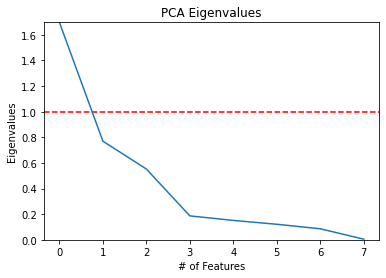

In [ ]:
import matplotlib.pyplot as plt 
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

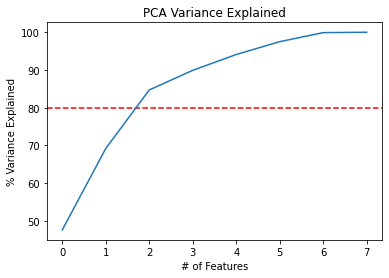

In [ ]:
variance = covar_matrix.explained_variance_ratio_ # calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
#plt.ylim(min(var), 100.1)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

after looking at elbow plots maybe 3

In [ ]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 3)
covar_matrix.fit(PCA_df)

PCA(n_components=3)

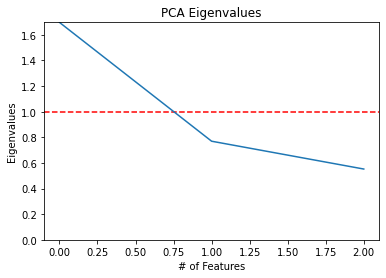

In [ ]:
import matplotlib.pyplot as plt 
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

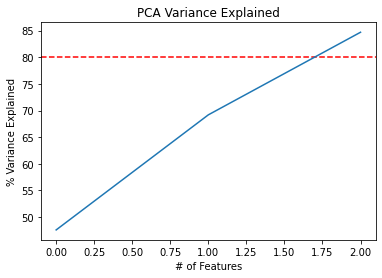

In [ ]:
variance = covar_matrix.explained_variance_ratio_ # calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
#plt.ylim(min(var), 100.1)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

3

In [ ]:
–